<a href="https://colab.research.google.com/github/Tejas9523/ANNLAB/blob/main/annlpr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

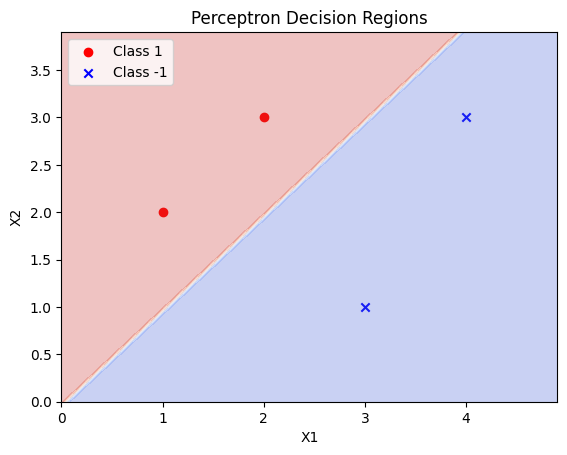

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def train(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.n_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
            if error == 0:
                break

    def predict(self, X):
        activation = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(activation >= 0.0, 1, -1)

# Sample data for demonstration
X = np.array([[1, 2], [2, 3], [3, 1], [4, 3]])
y = np.array([1, 1, -1, -1])

# Train the perceptron
perceptron = Perceptron()
perceptron.train(X, y)

# Plot decision regions
plt.scatter(X[:2, 0], X[:2, 1], color='red', marker='o', label='Class 1')
plt.scatter(X[2:, 0], X[2:, 1], color='blue', marker='x', label='Class -1')

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Regions')
plt.show()